# Do we need to include crowding in the field?

I'm using the data from /projects/p30137/ageller/testing/EBLSST/add_m5/fast/old


In [18]:
import pandas as pd
import numpy as np

from astropy.coordinates import SkyCoord
from astropy import units

import matplotlib.colors as colors
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df = pd.read_csv('outputFilesHead.csv')
df

,OpSimID,OpSimRA,OpSimDec,NstarsTRILEGAL,NOpSimObs_u,NOpSimObs_g,NOpSimObs_r,NOpSimObs_i,NOpSimObs_z,NOpSimObs_y
0,1.0,0.000000,-90.000000,103474.0,30,30,30,30,30,30
1,2.0,180.000000,-87.568558,125106.0,30,30,30,30,30,30
2,3.0,324.000427,-87.568550,101089.0,30,30,30,30,30,30
3,4.0,35.999573,-87.568550,90285.0,30,30,30,30,30,30
4,5.0,252.001099,-87.568550,128213.0,30,30,30,30,30,30
5,6.0,107.998894,-87.568550,112000.0,30,30,30,30,30,30
6,7.0,215.999817,-85.272911,168662.0,30,30,30,30,30,30
7,8.0,144.000183,-85.272911,134930.0,30,30,30,30,30,30
8,9.0,0.000000,-85.272896,87646.0,30,30,30,30,30,30
9,10.0,288.000519,-85.272850,121010.0,30,30,30,30,30,30


In [4]:
print(max(df['NstarsTRILEGAL']))

10281037679.306187


I am giving TRILEGAL an area of 10 square degrees, but the true LSST FoV is 3.5 degree in diameter

In [21]:
#get the ratio of the LSST FoV and the 10 deg that I used in TRILEGAL
LSSTFoV = np.pi*(3.5/2.)**2.
FoVratio = LSSTFoV/10.

#assume a uniform surface density stars/square degree
surfaceDensity = df['NstarsTRILEGAL']*FoVratio/LSSTFoV

#lets assume that seeing is 0.5 arcmin
resEl = np.pi*(0.5/2./60.)**2. 

#stars/resolution element
starsPerResEl = np.array(surfaceDensity*resEl)

print(max(starsPerResEl))

56074.361882965575


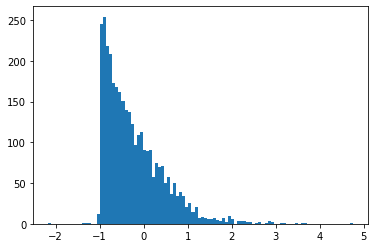

In [22]:
f, ax = plt.subplots()
xx = np.where(starsPerResEl > 0)
_ = ax.hist(np.log10(starsPerResEl[xx]), bins=100)

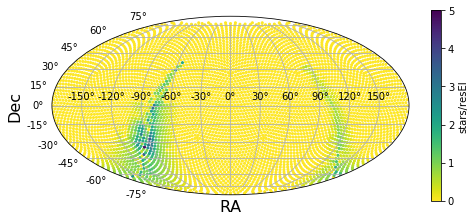

In [26]:
xx = np.where(starsPerResEl == 0)
starsPerResEl[xx] = 0.01

coords = SkyCoord(df['OpSimRA'], df['OpSimDec'], unit=(units.degree, units.degree),frame='icrs')

RAwrap = coords.ra.wrap_at(180.*units.degree).degree
Decwrap = coords.dec.wrap_at(180.*units.degree).degree

f, ax = plt.subplots(subplot_kw={'projection': "mollweide"}, figsize=(8,5))
ax.grid(True)
ax.set_xlabel("RA",fontsize=16)
ax.set_ylabel("Dec",fontsize=16)
mlw = ax.scatter(np.array(RAwrap).ravel()*np.pi/180., 
                 np.array(Decwrap).ravel()*np.pi/180., 
                 c=np.log10(starsPerResEl),
                 cmap='viridis_r', s = 4, vmin=0, vmax=5)
cbar = f.colorbar(mlw, shrink=0.7)
cbar.set_label(r'stars/resEl')
